In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/fraud_detection_dataset.csv'
data = pd.read_csv(file_path)

# Muestra del conjunto de datos
data_sample = data.sample(frac=0.1, random_state=42)

# Tomar una muestra aleatoria del 10% de los datos para pruebas iniciales
sample_size = int(len(data) * 0.1)  # 10% del tamaño total
data_sample = data.sample(n=sample_size, random_state=42)

# Visualizar las primeras filas de la muestra
print(f"Primeras filas de la muestra ({sample_size} filas):")
print(data_sample.head())

Mounted at /content/drive
Primeras filas de la muestra (636262 filas):
         step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   

         isFlaggedFraud  
3737323      

In [2]:
# Obtener información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(data_sample.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data_sample.describe())

# Verificar valores únicos en columnas categóricas
print("\nValores únicos en columnas categóricas:")
for col in data_sample.select_dtypes(include=['object']).columns:
    print(f"{col}: {data_sample[col].unique()}")



Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 636262 entries, 3737323 to 759063
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 58.3+ MB
None

Estadísticas descriptivas:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  636262.000000  6.362620e+05   6.362620e+05    6.362620e+05   
mean      24

In [ ]:
# Filtrar el DataFrame para seleccionar solo las filas donde isFraud es 1
transacciones_fraudulentas = data[data['isFraud'] == 1]

# Mostrar detalles de las transacciones fraudulentas
print("Detalles de las transacciones fraudulentas:")
print(transacciones_fraudulentas.head())

Detalles de las transacciones fraudulentas:
     step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2       1  TRANSFER    181.0  C1305486145          181.0             0.0   
3       1  CASH_OUT    181.0   C840083671          181.0             0.0   
251     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
252     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
680     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2     C553264065             0.0             0.0        1               0  
3      C38997010         21182.0             0.0        1               0  
251   C972765878             0.0             0.0        1               0  
252  C1007251739         26202.0             0.0        1               0  
680  C1848415041             0.0             0.0        1               0  


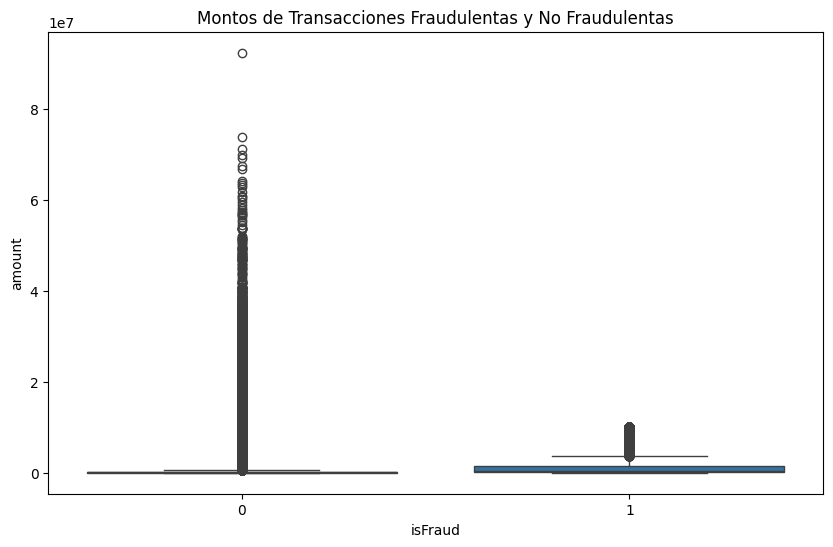

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparación de montos en transacciones fraudulentas y no fraudulentas
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Montos de Transacciones Fraudulentas y No Fraudulentas')
plt.show()

In [ ]:
data.shape[0]
data.shape
data.tail()
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


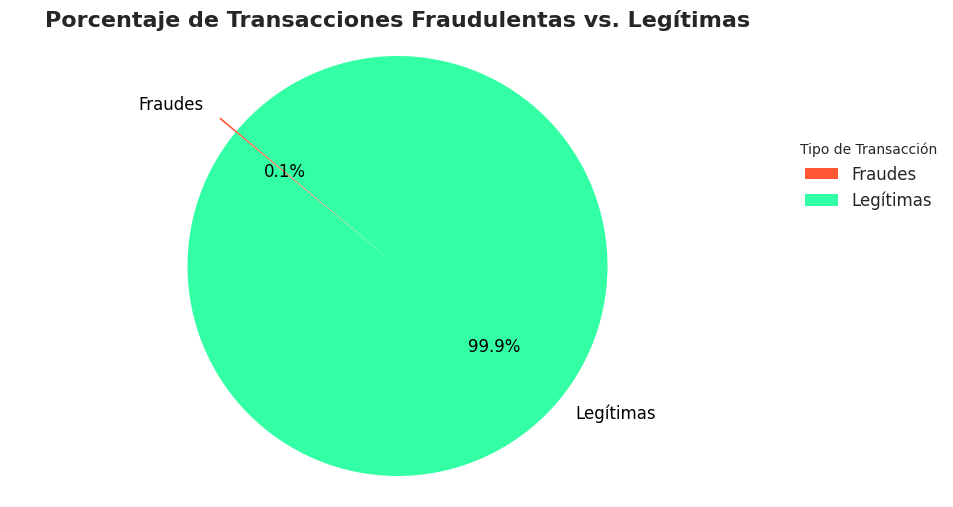

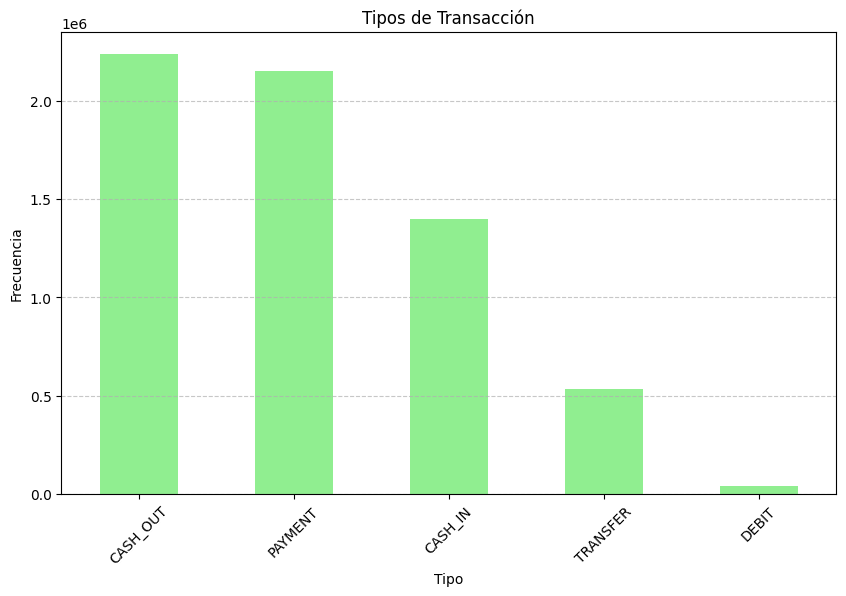


Gráfico de dispersión para la columna 'amount':


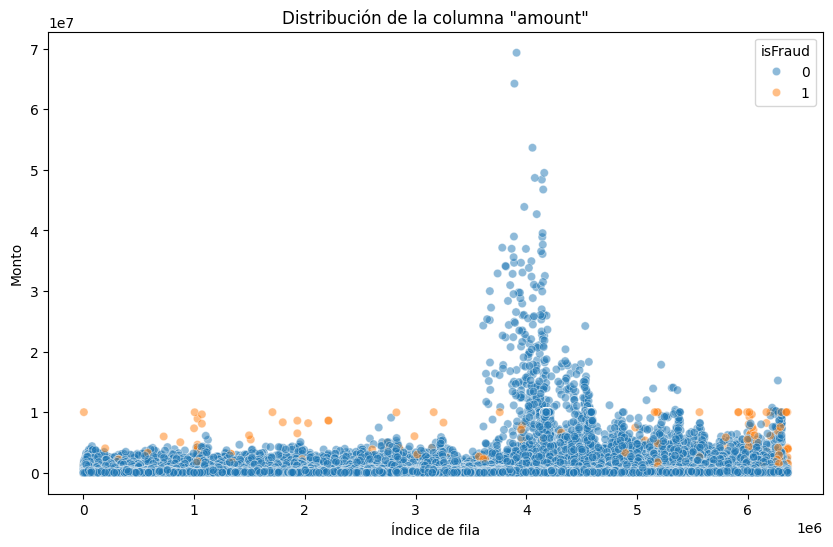

In [ ]:
# Contar el número de transacciones fraudulentas y legítimas
num_transacciones = len(data)
num_fraudes = data[data['isFraud'] == 1].shape[0]
num_legitimas = num_transacciones - num_fraudes

# Calcular porcentajes
porcentaje_fraudes = (num_fraudes / num_transacciones) * 100
porcentaje_legitimas = (num_legitimas / num_transacciones) * 100

# Etiquetas y tamaños para el gráfico
labels = ['Fraudes', 'Legítimas']
sizes = [porcentaje_fraudes, porcentaje_legitimas]

# Colores personalizados
colores_personalizados = ['#FF5733', '#33FFA4']  # Naranja y verde claro

# Ajustar la separación de la sección de fraudes
explode = (0.1, 0)  # Mayor separación para resaltar el fraude

# Crear el gráfico con un estilo profesional
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(10, 6))  # Tamaño del lienzo

    # Dibujar el gráfico de torta
    wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels,
                                       autopct='%1.1f%%', startangle=140, colors=colores_personalizados)

    # Personalizar la apariencia del texto
    for text in texts + autotexts:
        text.set_fontsize(12)  # Tamaño de fuente
        text.set_color('black')  # Color del texto

    ax.set_title('Porcentaje de Transacciones Fraudulentas vs. Legítimas', fontsize=16, fontweight='bold')  # Título del gráfico
    ax.axis('equal')  # Aspecto circular
    ax.legend(wedges, labels, loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=12, title='Tipo de Transacción')  # Leyenda personalizada

# Mostrar el gráfico
plt.show()

import matplotlib.pyplot as plt

# Crear un gráfico de barras de los tipos de transacción
plt.figure(figsize=(10, 6))
data['type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Tipos de Transacción')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de dispersión para la columna 'amount'
print("\nGráfico de dispersión para la columna 'amount':")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_sample.index, y='amount', data=data_sample, hue='isFraud', alpha=0.5)
plt.title('Distribución de la columna "amount"')
plt.xlabel('Índice de fila')
plt.ylabel('Monto')
plt.show()


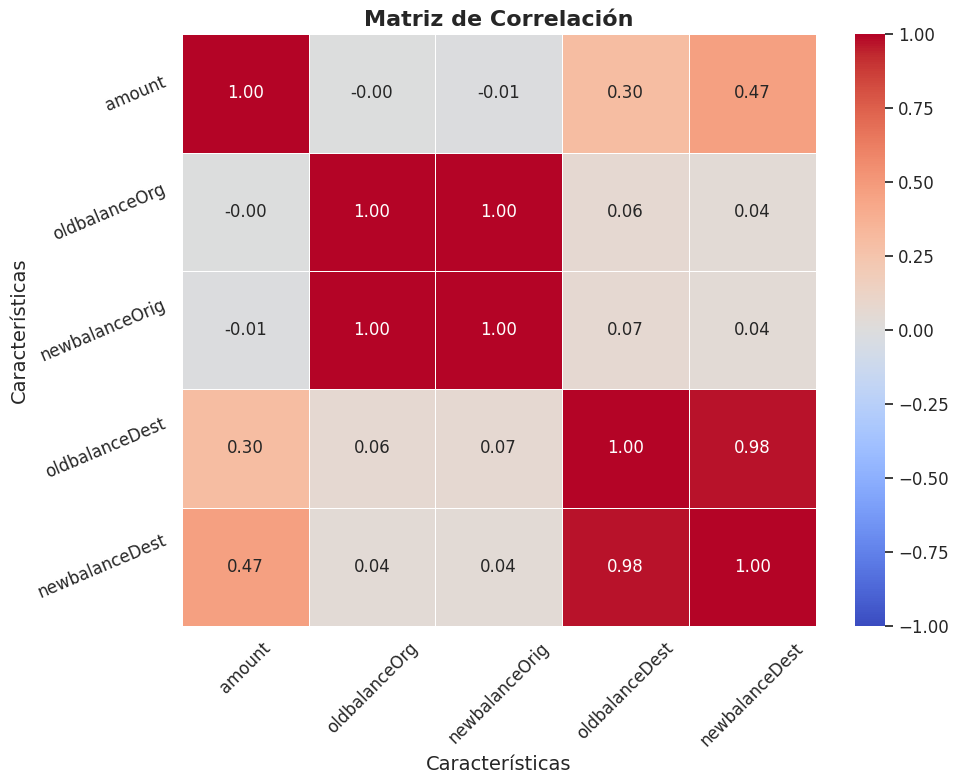

In [ ]:
# Tomar una muestra aleatoria del 10% del conjunto de datos
sample_size = int(len(data) * 0.1)
data_sample = data.sample(n=sample_size, random_state=42)

# Calcular la matriz de correlación
corr_matrix = data_sample[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

# Configurar el estilo de la figura
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")  # Utilizar el tema predeterminado de seaborn

# Crear la matriz de correlación
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Ajustar los elementos de la figura
plt.title("Matriz de Correlación", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Características", fontsize=14)
plt.ylabel("Características", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=23) # Rotar las etiquetas del eje x para una mejor legibilidad

# Ajustar el tamaño de la barra de color
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Mostrar la figura
plt.tight_layout()  # Ajustar el espaciado para evitar superposiciones
plt.show()

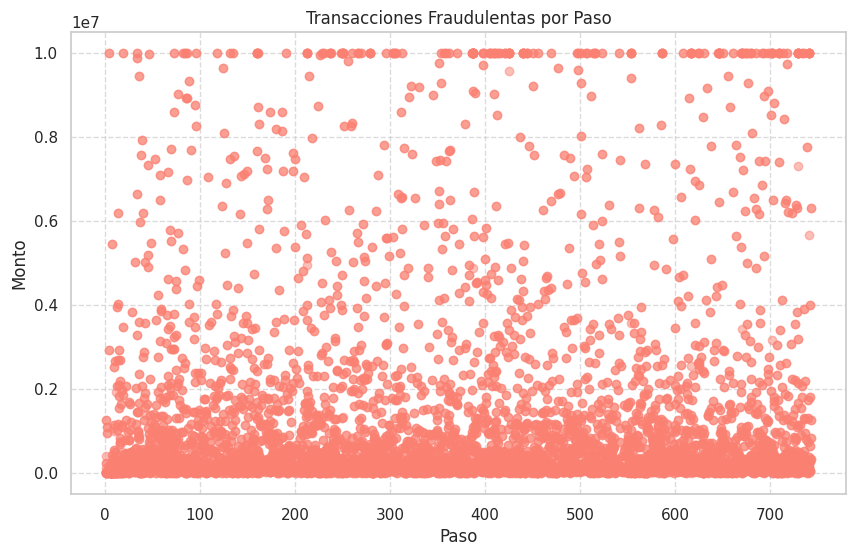

In [ ]:
# Crear un gráfico de dispersión de transacciones fraudulentas
plt.figure(figsize=(10, 6))
data_fraud = data[data['isFraud'] == 1]
plt.scatter(data_fraud['step'], data_fraud['amount'], alpha=0.5, color='salmon')
plt.title('Transacciones Fraudulentas por Paso')
plt.xlabel('Paso')
plt.ylabel('Monto')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
fraudulent_transactions_by_type = data[data['isFraud'] == 1].groupby('type').size()
total_transactions_by_type = data.groupby('type').size()
fraudulent_percentage_by_type = fraudulent_transactions_by_type / total_transactions_by_type
print("Proporción de transacciones fraudulentas por tipo:")
print(fraudulent_percentage_by_type)


Proporción de transacciones fraudulentas por tipo:
type
CASH_IN          NaN
CASH_OUT    0.001840
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.007688
dtype: float64


In [ ]:
fraudulent_transactions_stats = data[data['isFraud'] == 1].describe()
legitimate_transactions_stats = data[data['isFraud'] == 0].describe()
print("Estadísticas descriptivas de transacciones fraudulentas:")
print(fraudulent_transactions_stats)
print("\nEstadísticas descriptivas de transacciones legítimas:")
print(legitimate_transactions_stats)

Estadísticas descriptivas de transacciones fraudulentas:
              step        amount  oldbalanceOrg  newbalanceOrig  \
count  8213.000000  8.213000e+03   8.213000e+03    8.213000e+03   
mean    368.413856  1.467967e+06   1.649668e+06    1.923926e+05   
std     216.388690  2.404253e+06   3.547719e+06    1.965666e+06   
min       1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%     181.000000  1.270913e+05   1.258224e+05    0.000000e+00   
50%     367.000000  4.414234e+05   4.389835e+05    0.000000e+00   
75%     558.000000  1.517771e+06   1.517771e+06    0.000000e+00   
max     743.000000  1.000000e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    8.213000e+03    8.213000e+03   8213.0     8213.000000  
mean     5.442496e+05    1.279708e+06      1.0        0.001948  
std      3.336421e+06    3.908817e+06      0.0        0.044097  
min      0.000000e+00    0.000000e+00      1.0        0.000000  
25%      0.000

<ipython-input-4-9a0ad6a3f8ec>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scalar_map)


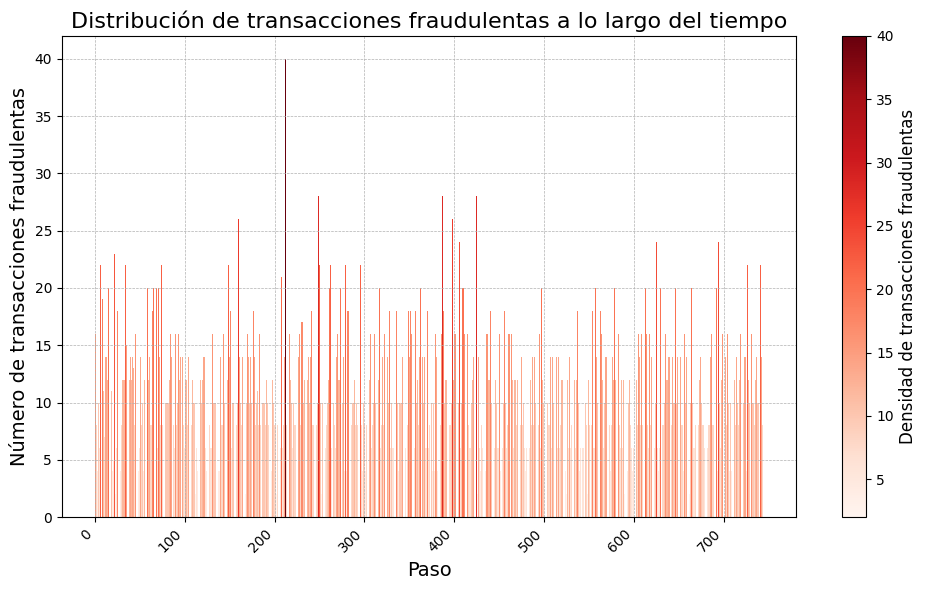

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Obtener los datos de transacciones fraudulentas por paso
fraudulent_transactions_by_step = data[data['isFraud'] == 1].groupby('step').size()
steps = fraudulent_transactions_by_step.index.to_numpy()  # Obtener las etiquetas de paso
step_counts = fraudulent_transactions_by_step.to_numpy()  # Obtener los conteos de transacciones fraudulentas

# Crear una paleta de colores personalizada
cmap = plt.get_cmap('Reds')  # Utilizar una paleta de colores rojos
norm = colors.Normalize(vmin=step_counts.min(), vmax=step_counts.max())  # Normalizar los valores de color
scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
colors = scalar_map.to_rgba(step_counts)

# Crear el plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(steps, step_counts, color=colors)

# Personalización del plot
ax.set_xlabel('Paso', fontsize=14)
ax.set_ylabel('Número de transacciones fraudulentas', fontsize=14)
ax.set_title('Distribución de transacciones fraudulentas a lo largo del tiempo', fontsize=16)
ax.grid(True, linestyle='--', linewidth=0.5)

# Ajustes adicionales
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir barra de colores
cbar = plt.colorbar(scalar_map)
cbar.set_label('Densidad de transacciones fraudulentas', fontsize=12)

# Mostrar el plot
plt.show()


In [ ]:
# Filtrar transacciones fraudulentas de tipo "CASH_OUT" y "TRANSFER"
fraud_cash_out = data[(data['isFraud'] == 1) & (data['type'] == 'CASH_OUT')]
fraud_transfer = data[(data['isFraud'] == 1) & (data['type'] == 'TRANSFER')]

# Imprimir detalles de las transacciones fraudulentas de tipo "CASH_OUT"
print("Detalles de las transacciones fraudulentas de tipo CASH_OUT:")
print(fraud_cash_out.head())

# Imprimir detalles de las transacciones fraudulentas de tipo "TRANSFER"
print("\nDetalles de las transacciones fraudulentas de tipo TRANSFER:")
print(fraud_transfer.head())


Detalles de las transacciones fraudulentas de tipo CASH_OUT:
     step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
3       1  CASH_OUT      181.00   C840083671         181.00             0.0   
252     1  CASH_OUT     2806.00  C2101527076        2806.00             0.0   
681     1  CASH_OUT    20128.00  C1118430673       20128.00             0.0   
724     1  CASH_OUT   416001.33   C749981943           0.00             0.0   
970     1  CASH_OUT  1277212.77   C467632528     1277212.77             0.0   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
3      C38997010         21182.0            0.00        1               0  
252  C1007251739         26202.0            0.00        1               0  
681   C339924917          6268.0        12145.85        1               0  
724   C667346055           102.0      9291619.62        1               0  
970   C716083600             0.0      2444985.19        1               0  

Detalle

In [ ]:
# Verificar nombres de origen y destino de las transacciones fraudulentas
print("Nombres de origen únicos (CASH_OUT):", fraud_cash_out['nameOrig'].unique())
print("Nombres de destino únicos (CASH_OUT):", fraud_cash_out['nameDest'].unique())

print("Nombres de origen únicos (TRANSFER):", fraud_transfer['nameOrig'].unique())
print("Nombres de destino únicos (TRANSFER):", fraud_transfer['nameDest'].unique())


Nombres de origen únicos (CASH_OUT): ['C840083671' 'C2101527076' 'C1118430673' ... 'C786484425' 'C1162922333'
 'C1280323807']
Nombres de destino únicos (CASH_OUT): ['C38997010' 'C1007251739' 'C339924917' ... 'C776919290' 'C1365125890'
 'C873221189']
Nombres de origen únicos (TRANSFER): ['C1305486145' 'C1420196421' 'C137533655' ... 'C2013999242' 'C1529008245'
 'C1685995037']
Nombres de destino únicos (TRANSFER): ['C553264065' 'C972765878' 'C1848415041' ... 'C1850423904' 'C1881841831'
 'C2080388513']
